# "وَأَن لَّيْسَ لِلْإِنسَانِ إِلَّا مَا سَعَىٰ (39) وَأَنَّ سَعْيَهُ سَوْفَ يُرَىٰ (40) ثُمَّ يُجْزَاهُ الْجَزَاءَ الْأَوْفَىٰ"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [2]:
file=pd.read_csv('Global_Cybersecurity_Threats_2015-2024.csv')

In [3]:
file

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68
...,...,...,...,...,...,...,...,...,...,...
2995,UK,2021,Ransomware,Government,51.42,190694,Unknown,Social Engineering,Firewall,52
2996,Brazil,2023,SQL Injection,Telecommunications,30.28,892843,Hacker Group,Zero-day,VPN,26
2997,Brazil,2017,SQL Injection,IT,32.97,734737,Nation-state,Weak Passwords,AI-based Detection,30
2998,UK,2022,SQL Injection,IT,32.17,379954,Insider,Unpatched Software,Firewall,9


# Show data info

In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


# Summary Statistics

In [5]:
file.describe()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


# Check Null Values

In [6]:
file.isnull().sum()

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

# Check Duplicated Values

In [7]:
file.duplicated().sum()

0

# Check Outliers

In [8]:
list_1=file[['Financial Loss (in Million $)','Number of Affected Users','Incident Resolution Time (in Hours)']]

for col in list_1:
    Q1 = list_1[col].quantile(0.25)
    Q3 = list_1[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = list_1[(list_1[col] < Q1 - 1.5*IQR) | (list_1[col] > Q3 + 1.5*IQR)]

    print(f"{col} - Number of outliers:", outliers.shape[0])
  


Financial Loss (in Million $) - Number of outliers: 0
Number of Affected Users - Number of outliers: 0
Incident Resolution Time (in Hours) - Number of outliers: 0


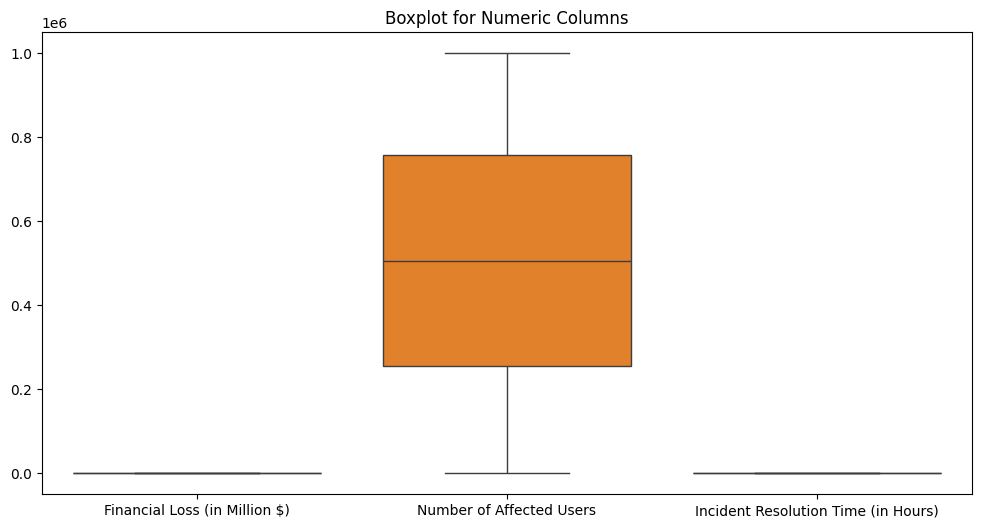

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(data=file[['Financial Loss (in Million $)','Number of Affected Users','Incident Resolution Time (in Hours)']])
plt.title('Boxplot for Numeric Columns')
plt.show()



# Advanced Statistical Summary

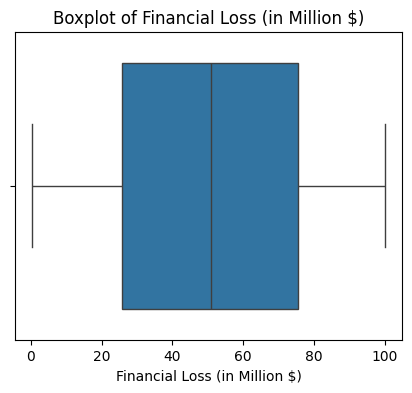

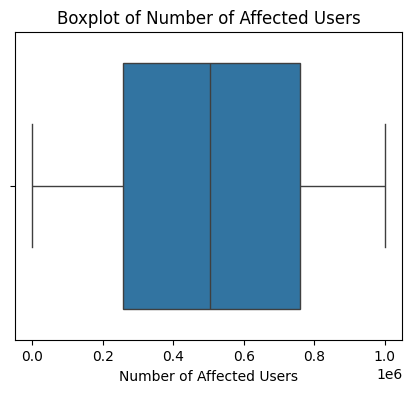

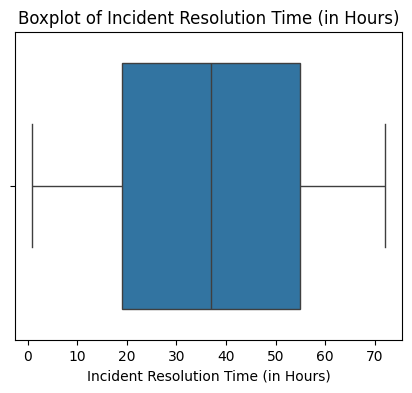

                                              Mean      Median            Std  \
Financial Loss (in Million $)            50.492970      50.795      28.791415   
Number of Affected Users             504684.136333  504513.000  289944.084972   
Incident Resolution Time (in Hours)      36.476000      37.000      20.570768   

                                       Min           Q1         Q3        Max  \
Financial Loss (in Million $)          0.5      25.7575      75.63      99.99   
Number of Affected Users             424.0  255805.2500  758088.50  999635.00   
Incident Resolution Time (in Hours)    1.0      19.0000      55.00      72.00   

                                         Range  Skewness  Kurtosis  Outliers  
Financial Loss (in Million $)            99.49 -0.016860 -1.210248       0.0  
Number of Affected Users             999211.00 -0.025397 -1.203704       0.0  
Incident Resolution Time (in Hours)      71.00  0.011104 -1.192617       0.0  


In [87]:
cols = ['Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']

summary_df = pd.DataFrame(columns=['Mean','Median','Std','Min','Q1','Q3','Max','Range','Skewness','Kurtosis','Outliers'])

for col in cols:
    Q1 = file[col].quantile(0.25)
    Q3 = file[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = file[(file[col] < Q1 - 1.5*IQR) | (file[col] > Q3 + 1.5*IQR)]
    
    summary_df.loc[col] = [
        file[col].mean(),
        file[col].median(),
        file[col].std(),
        file[col].min(),
        Q1,
        Q3,
        file[col].max(),
        file[col].max() - file[col].min(),
        file[col].skew(),
        file[col].kurtosis(),
        outliers.shape[0]
    ]
    
    plt.figure(figsize=(5,4))
    sns.boxplot(x=file[col])
    acc=94.54
    plt.title(f'Boxplot of {col}')
    plt.show()

print(summary_df)


## ---------------------------------------**Questions to answer**------------------------------------


In [11]:
""""
# General Questions: (Descreptive Questions)
    1- Which countries are most targeted by cyberattacks? Are there noticeable differences between them?
    2- How has the number of attacks changed over the years (Year)? Is there an upward trend?
    3- What are the most common types of attacks (Attack Type) globally?
    4- Which industries (Target Industry) are the most frequently targeted?
    5- What is the average financial loss (Financial Loss) per country or attack type?
    6- What is the relationship between the number of affected users (Number of Affected Users) and the financial loss?
    7- What are the most common attack sources (Attack Source) (e.g., Hacker Group, Nation-state)?
    8- Which security vulnerabilities (Security Vulnerability Type) contribute the most to attacks?
    9- Do certain defense mechanisms (Defense Mechanism Used) reduce incident resolution time (Incident Resolution Time)?
    10- Are there differences between countries in how quickly incidents are resolved?

# Advanced Questions:
    11- Is there a relationship between attack type (Attack Type) and target industry (Target Industry)?
    12- Do attacks from Nation-states cause higher financial losses compared to others?
    13- Are some industries (e.g., Healthcare) more affected in terms of the number of users?
    14- How do average financial losses change over the years? Are they increasing or decreasing?
    15- Which defense mechanism (Defense Mechanism Used) proves to be most effective in reducing losses or affected users?
    16- Are certain countries more prone to specific types of attacks (e.g., more DDoS in the USA, more Phishing in India)?
    17- Is there a relationship between the number of affected users and the resolution time (do larger incidents take longer to resolve)?
    18- Do "Zero-day" attacks take longer to resolve compared to "Weak Passwords"?
    19- Which years recorded the highest total financial losses?
    20- Can we predict future attack types based on country and industry? (for Machine Learning tasks).

"""

'"\n# General Questions: (Descreptive Questions)\n    1- Which countries are most targeted by cyberattacks? Are there noticeable differences between them?\n    2- How has the number of attacks changed over the years (Year)? Is there an upward trend?\n    3- What are the most common types of attacks (Attack Type) globally?\n    4- Which industries (Target Industry) are the most frequently targeted?\n    5- What is the average financial loss (Financial Loss) per country or attack type?\n    6- What is the relationship between the number of affected users (Number of Affected Users) and the financial loss?\n    7- What are the most common attack sources (Attack Source) (e.g., Hacker Group, Nation-state)?\n    8- Which security vulnerabilities (Security Vulnerability Type) contribute the most to attacks?\n    9- Do certain defense mechanisms (Defense Mechanism Used) reduce incident resolution time (Incident Resolution Time)?\n    10- Are there differences between countries in how quickly in

| #  | Question                                                                                                                           | Analysis Type |
| -- | ---------------------------------------------------------------------------------------------------------------------------------- | ------------- |
| 1  | Which countries are most targeted by cyberattacks? Are there noticeable differences between them?                                  | Descriptive   |
| 2  | How has the number of attacks changed over the years (Year)? Is there an upward trend?                                             | Descriptive   |
| 3  | What are the most common types of attacks (Attack Type) globally?                                                                  | Descriptive   |
| 4  | Which industries (Target Industry) are the most frequently targeted?                                                               | Descriptive   |
| 5  | What is the average financial loss (Financial Loss) per country or attack type?                                                    | Descriptive   |
| 6  | What is the relationship between the number of affected users (Number of Affected Users) and the financial loss?                   | Descriptive   |
| 7  | What are the most common attack sources (Attack Source) (e.g., Hacker Group, Nation-state)?                                        | Descriptive   |
| 8  | Which security vulnerabilities (Security Vulnerability Type) contribute the most to attacks?                                       | Descriptive   |
| 9  | Do certain defense mechanisms (Defense Mechanism Used) reduce incident resolution time (Incident Resolution Time)?                 | **Prescriptive**  |
| 10 | Are there differences between countries in how quickly incidents are resolved?                                                     | Descriptive   |
| 11 | Is there a relationship between attack type (Attack Type) and target industry (Target Industry)?                                   | Descriptive   |
| 12 | Do attacks from Nation-states cause higher financial losses compared to others?                                                    | Descriptive   |
| 13 | Are some industries (e.g., Healthcare) more affected in terms of the number of users?                                              | Descriptive   |
| 14 | How do average financial losses change over the years? Are they increasing or decreasing?                                          | Descriptive   |
| 15 | Which defense mechanism (Defense Mechanism Used) proves to be most effective in reducing losses or affected users?                 | **Prescriptive**  |
| 16 | Are certain countries more prone to specific types of attacks (e.g., more DDoS in the USA, more Phishing in India)?                | Descriptive   |
| 17 | Is there a relationship between the number of affected users and the resolution time (do larger incidents take longer to resolve)? | Descriptive   |
| 18 | Do "Zero-day" attacks take longer to resolve compared to "Weak Passwords"?                                                         | Descriptive   |
| 19 | Which years recorded the highest total financial losses?                                                                           | Descriptive   |
| 20 | Can we predict future attack types based on country and industry? (for Machine Learning tasks).                                    | *Predictive*    |


---
## ---------------------------------------****Start answering questions****----------------------------------------


## -------------------------------------------**Descreptive Analysis**--------------------------------------------


## --------------------------------------------***Data Visualization***---------------------------------------------


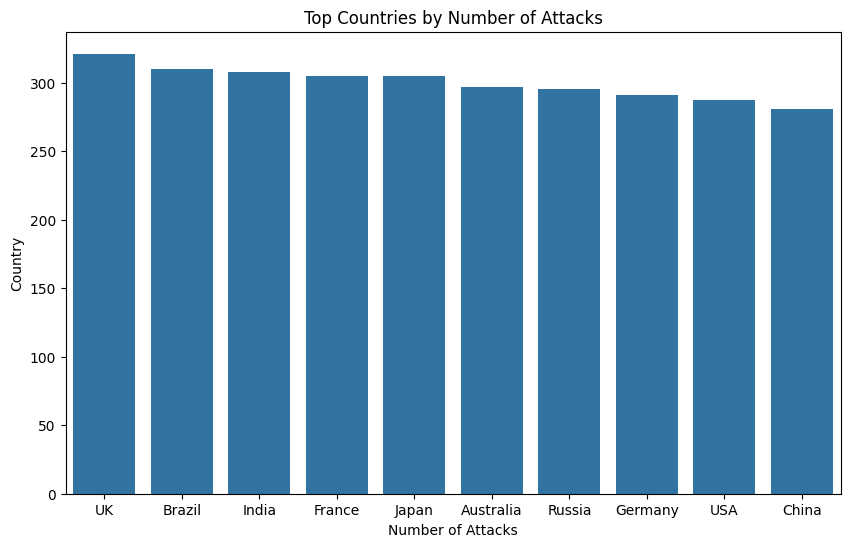

In [12]:

country_counts = file['Country'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=country_counts.index,y=country_counts.values )

plt.xlabel("Number of Attacks")
plt.ylabel("Country")
plt.title("Top Countries by Number of Attacks")
plt.show()


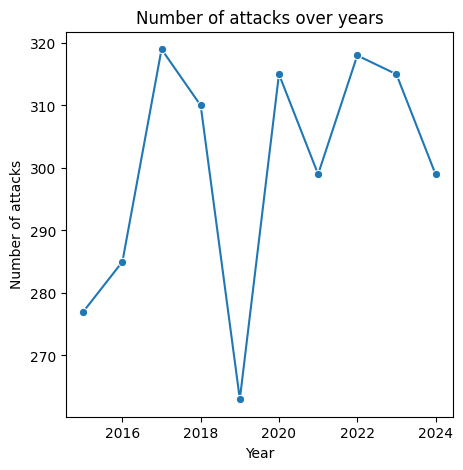

In [13]:
year_count=file['Year'].value_counts().sort_index()
plt.figure(figsize=(5,5))
sns.lineplot(x=year_count.index,y=year_count.values,marker='o')
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.title("Number of attacks over years")
plt.show()

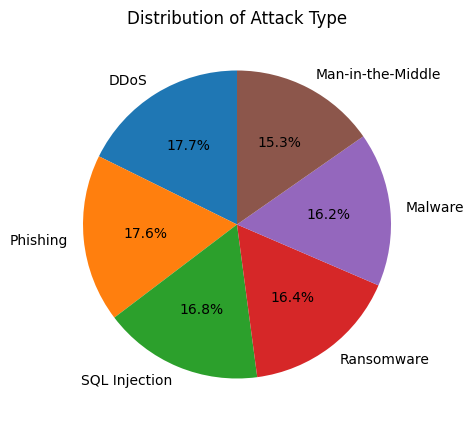

In [14]:
plt.figure(figsize=(5,5))
plt.pie(x=file['Attack Type'].value_counts(),labels=file['Attack Type'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Attack Type')
plt.show()

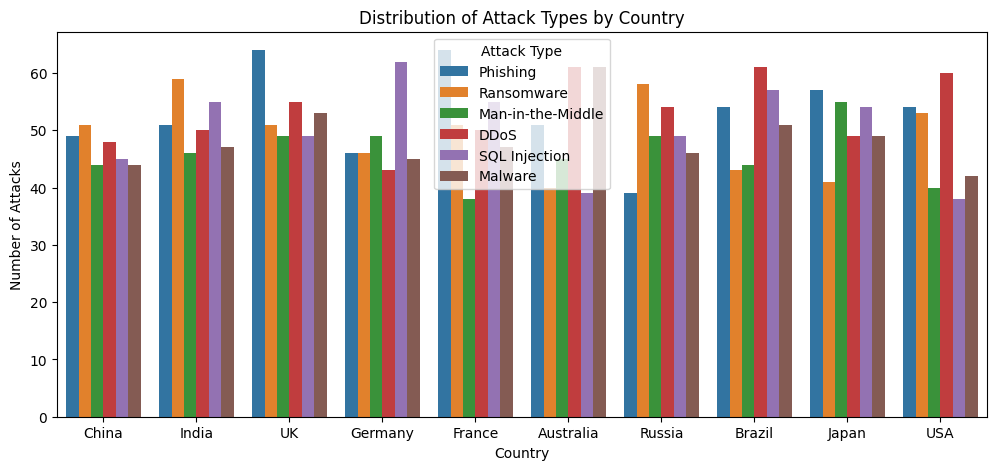

In [15]:
plt.figure(figsize=(12,5))
sns.countplot(data=file,x='Country',hue='Attack Type')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.title('Distribution of Attack Types by Country')
plt.show()


In [16]:
top_3_attacks_per_each_country=(file.groupby('Country')['Attack Type'].value_counts().groupby(level=0).head(3))
top_3_attacks_per_each_country
    

Country    Attack Type      
Australia  DDoS                 61
           Malware              61
           Phishing             51
Brazil     DDoS                 61
           SQL Injection        57
           Phishing             54
China      Ransomware           51
           Phishing             49
           DDoS                 48
France     Phishing             64
           SQL Injection        55
           Ransomware           51
Germany    SQL Injection        62
           Man-in-the-Middle    49
           Phishing             46
India      Ransomware           59
           SQL Injection        55
           Phishing             51
Japan      Phishing             57
           Man-in-the-Middle    55
           SQL Injection        54
Russia     Ransomware           58
           DDoS                 54
           Man-in-the-Middle    49
UK         Phishing             64
           DDoS                 55
           Malware              53
USA        DDoS           

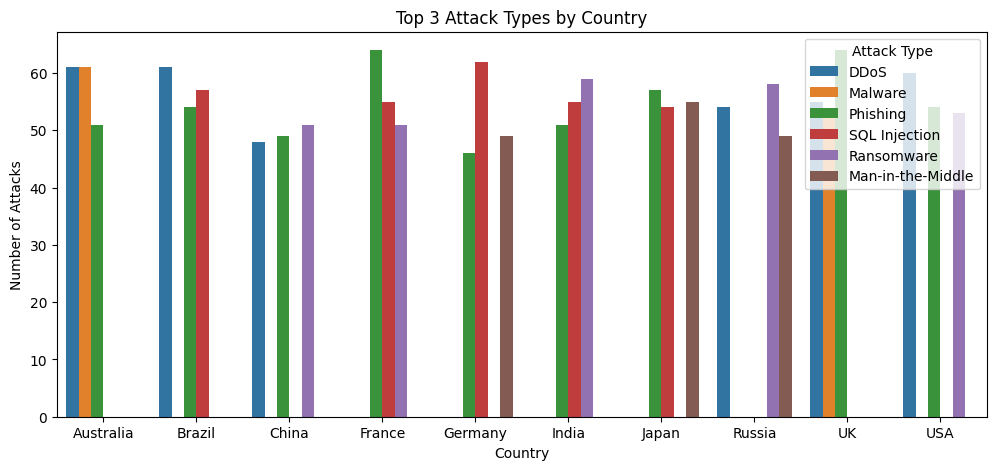

In [17]:
top_3_df=top_3_attacks_per_each_country.reset_index(name='Count')
top_3_df.rename(columns={'Level_1':'Attack Type'},inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data=top_3_df,x='Country',y='Count',hue='Attack Type')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')

plt.title('Top 3 Attack Types by Country')
plt.show()

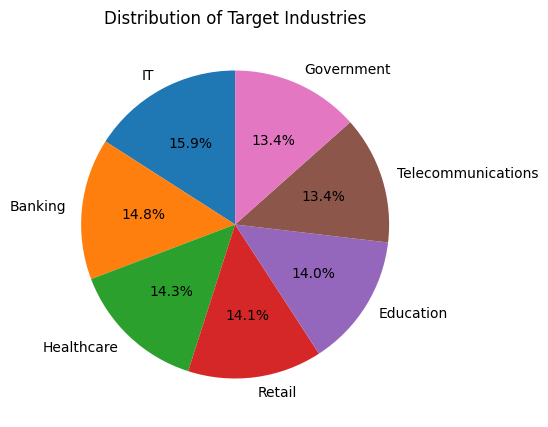

In [18]:
plt.figure(figsize=(5,5))
plt.pie(x=file['Target Industry'].value_counts(),labels=file['Target Industry'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Target Industries')
plt.show()

C:\Users\User.DESKTOP-OQ6NE4T\AppData\Local\Temp\ipykernel_22480\3317201795.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\User.DESKTOP-OQ6NE4T\AppData\Local\Temp\ipykernel_22480\3317201795.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


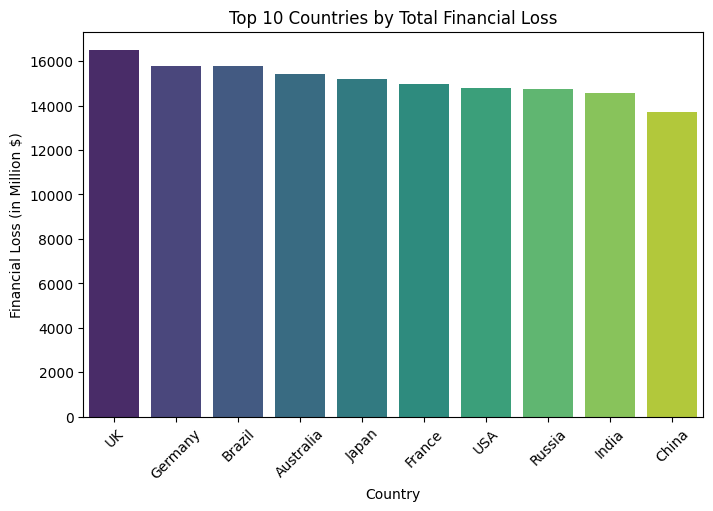

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(
    x="Country", 
    y="Financial Loss (in Million $)", 
    data=file, 
    estimator=np.sum, 
    ci=None, 
    palette="viridis", 
    order=file.groupby("Country")["Financial Loss (in Million $)"].sum().sort_values(ascending=False).index[:10]
)
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Total Financial Loss")
plt.show()

C:\Users\User.DESKTOP-OQ6NE4T\AppData\Local\Temp\ipykernel_22480\2805492134.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=file['Attack Source'].value_counts().index, y=file['Attack Source'].value_counts().values,palette="viridis")


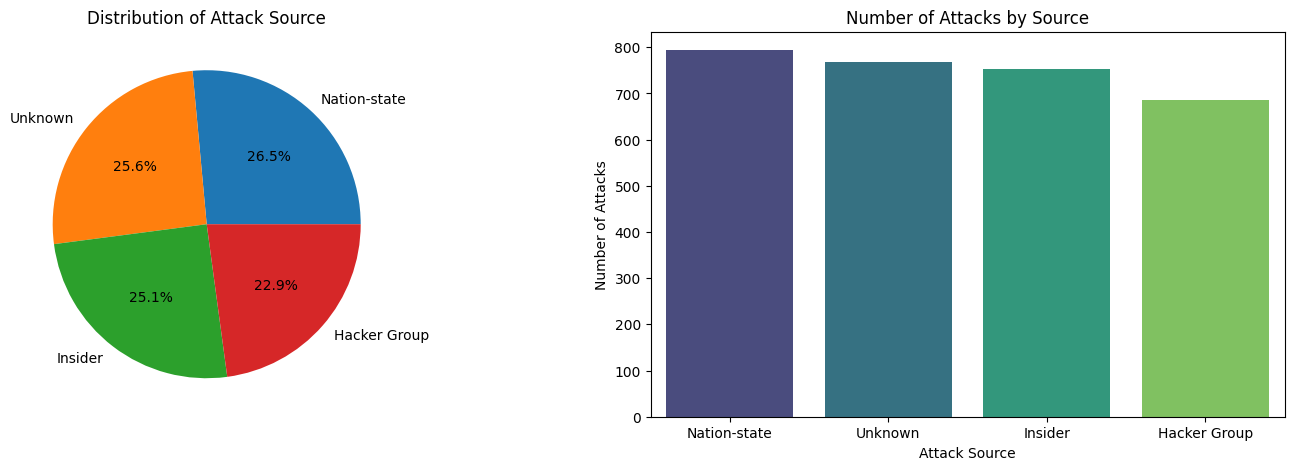

In [20]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.pie(x=file['Attack Source'].value_counts(),labels=file['Attack Source'].value_counts().index,autopct='%1.1f%%')
plt.title('Distribution of Attack Source')

plt.subplot(1,2,2)
sns.barplot(x=file['Attack Source'].value_counts().index, y=file['Attack Source'].value_counts().values,palette="viridis")
plt.title('Number of Attacks by Source')
plt.xlabel('Attack Source')
plt.ylabel('Number of Attacks')

plt.show()


C:\Users\User.DESKTOP-OQ6NE4T\AppData\Local\Temp\ipykernel_22480\3477910000.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var_count.index,y=var_count,palette='viridis')


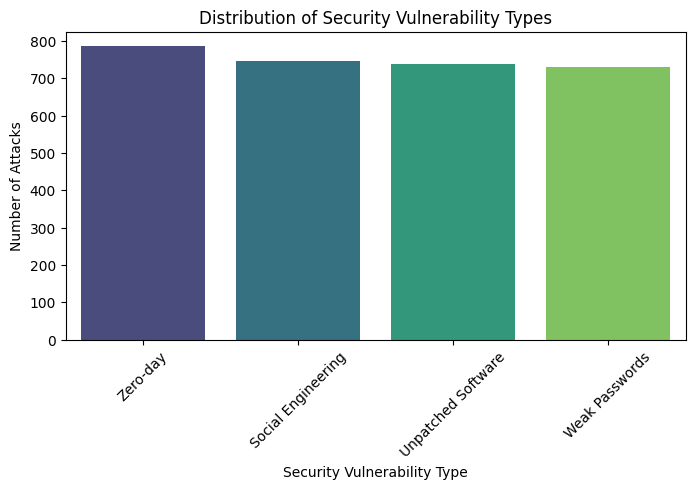

In [21]:
var_count=file['Security Vulnerability Type'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(x=var_count.index,y=var_count,palette='viridis')
plt.xlabel('Security Vulnerability Type')
plt.ylabel('Number of Attacks')
plt.title('Distribution of Security Vulnerability Types')
plt.xticks(rotation=45)
plt.show()

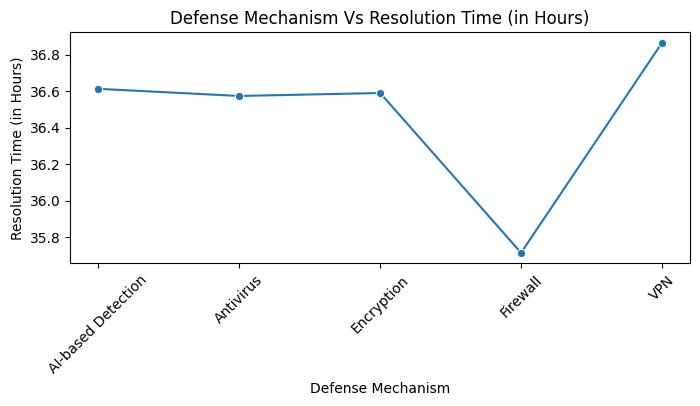

In [22]:
defense_time=file.groupby('Defense Mechanism Used')['Incident Resolution Time (in Hours)'].mean()
plt.figure(figsize=(8,3))
sns.lineplot(x=defense_time.index,y=defense_time.values,marker='o')
plt.xlabel('Defense Mechanism')
plt.ylabel('Resolution Time (in Hours)')
plt.title('Defense Mechanism Vs Resolution Time (in Hours)')
plt.xticks(rotation=45)
plt.show()

C:\Users\User.DESKTOP-OQ6NE4T\AppData\Local\Temp\ipykernel_22480\411653875.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=Resolution_Time_per_country.index,y=Resolution_Time_per_country.values,marker='o',palette='viridis')


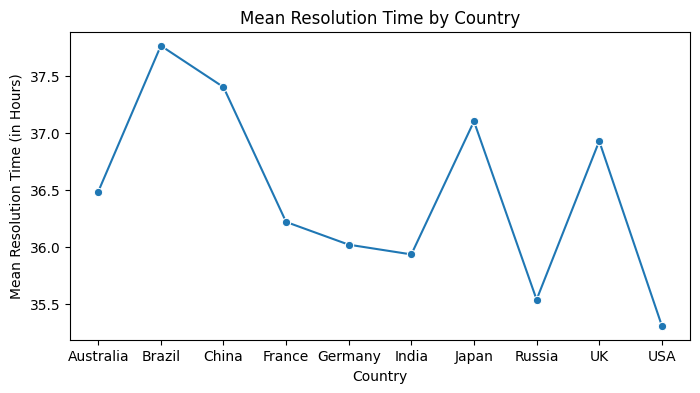

In [23]:
Resolution_Time_per_country=file.groupby('Country')['Incident Resolution Time (in Hours)'].mean()
plt.figure(figsize=(8,4))
sns.lineplot(x=Resolution_Time_per_country.index,y=Resolution_Time_per_country.values,marker='o',palette='viridis')
plt.xlabel('Country')
plt.ylabel('Mean Resolution Time (in Hours)')
plt.title('Mean Resolution Time by Country')
plt.show()


In [24]:
defense_mechanism_for_each_attack=file.groupby('Attack Type')['Defense Mechanism Used'].value_counts().groupby(level=0).head(5)
new_data_frame=defense_mechanism_for_each_attack.reset_index(name="Count")
new_data_frame

,Attack Type,Defense Mechanism Used,Count
0,DDoS,VPN,120
1,DDoS,AI-based Detection,113
2,DDoS,Antivirus,103
3,DDoS,Firewall,103
4,DDoS,Encryption,92
5,Malware,Antivirus,111
6,Malware,AI-based Detection,102
7,Malware,Firewall,99
8,Malware,VPN,87
9,Malware,Encryption,86


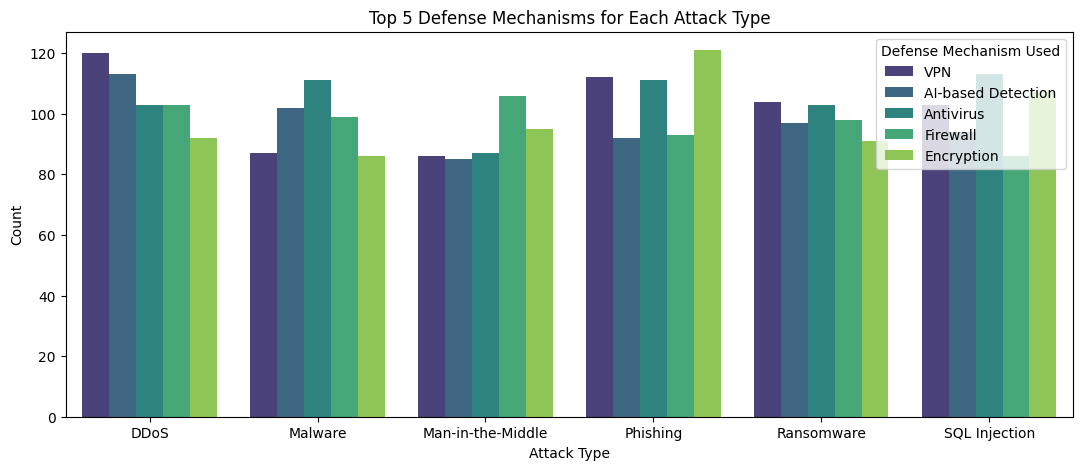

In [25]:
plt.figure(figsize=(13,5))
sns.barplot(x='Attack Type',y='Count',hue='Defense Mechanism Used',data=new_data_frame,palette='viridis')
plt.title('Top 5 Defense Mechanisms for Each Attack Type')
plt.show()

---
## ----------------------------------------**Advanced Questions**-----------------------------------------------
## ---------------------------------------------------------------------------------------------------------------

In [26]:
"""
    Advanced Questions:
        11- Is there a relationship between attack type (Attack Type) and target industry (Target Industry)?
        12- Do attacks from Nation-states cause higher financial losses compared to others?
        13- Are some industries (e.g., Healthcare) more affected in terms of the number of users?
        14- How do average financial losses change over the years? Are they increasing or decreasing?
        15- Which defense mechanism (Defense Mechanism Used) proves to be most effective in reducing losses or affected users?
        16- Are certain countries more prone to specific types of attacks (e.g., more DDoS in the USA, more Phishing in India)?
        17- Is there a relationship between the number of affected users and the resolution time (do larger incidents take longer to resolve)?
        18- Do "Zero-day" attacks take longer to resolve compared to "Weak Passwords"?
        19- Which years recorded the highest total financial losses?
        20- Can we predict future attack types based on country and industry? (for Machine Learning tasks).
        
"""

'\n    Advanced Questions:\n        11- Is there a relationship between attack type (Attack Type) and target industry (Target Industry)?\n        12- Do attacks from Nation-states cause higher financial losses compared to others?\n        13- Are some industries (e.g., Healthcare) more affected in terms of the number of users?\n        14- How do average financial losses change over the years? Are they increasing or decreasing?\n        15- Which defense mechanism (Defense Mechanism Used) proves to be most effective in reducing losses or affected users?\n        16- Are certain countries more prone to specific types of attacks (e.g., more DDoS in the USA, more Phishing in India)?\n        17- Is there a relationship between the number of affected users and the resolution time (do larger incidents take longer to resolve)?\n        18- Do "Zero-day" attacks take longer to resolve compared to "Weak Passwords"?\n        19- Which years recorded the highest total financial losses?\n        

## -------------------------------------------***Data Visualization***----------------------------------------------


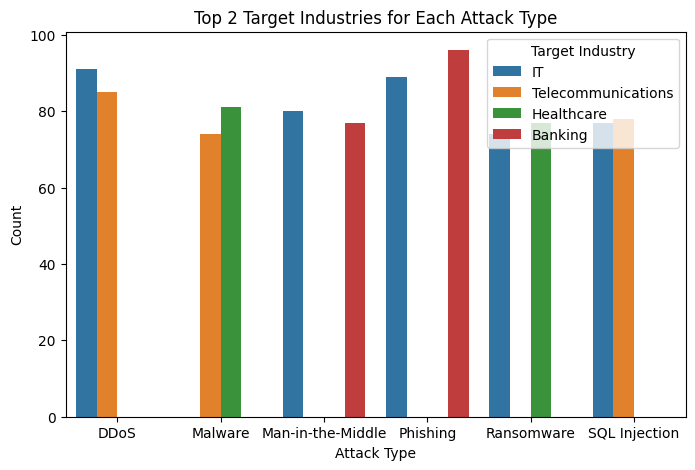

In [27]:
attack_type_target_industry=file.groupby('Attack Type')['Target Industry'].value_counts().groupby(level=0).head(2)

attack_type_target_industry=attack_type_target_industry.reset_index(name='Count')

plt.figure(figsize=(8,5))
sns.barplot(data=attack_type_target_industry,x='Attack Type',y='Count',hue='Target Industry')
plt.title('Top 2 Target Industries for Each Attack Type')
plt.show()

In [28]:
loss_attack_source=file.groupby('Attack Source')['Financial Loss (in Million $)'].sum().nlargest(4)
loss_attack_source=loss_attack_source.reset_index(name='Total Financial Loss M$')
loss_attack_source

,Attack Source,Total Financial Loss M$
0,Nation-state,40497.22
1,Unknown,38810.61
2,Insider,36673.51
3,Hacker Group,35497.57


In [29]:
affected_users_each_industry=file.groupby('Target Industry')['Number of Affected Users'].sum().nlargest(4)
affected_users_each_industry=affected_users_each_industry.reset_index(name="Number of affected users")
affected_users_each_industry

,Target Industry,Number of affected users
0,IT,250094829
1,Banking,225098406
2,Healthcare,216271916
3,Education,215004732


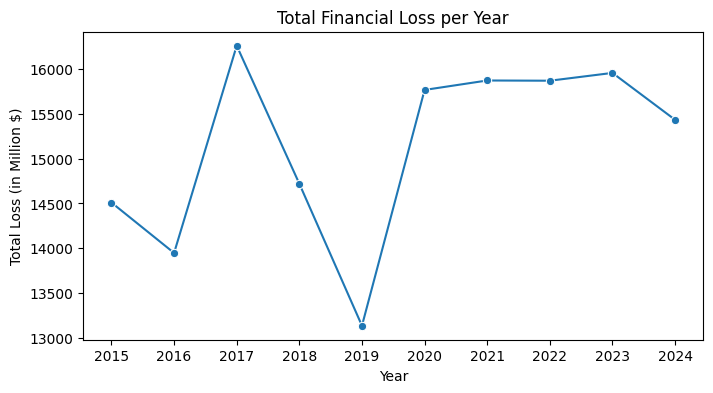

In [30]:
loss_for_each_year=file.groupby('Year')['Financial Loss (in Million $)'].sum().groupby(level=0).head()
loss_for_each_year=loss_for_each_year.reset_index(name="Total loss for each year")

plt.figure(figsize=(8,4))
sns.lineplot(data=loss_for_each_year, x='Year', y='Total loss for each year', marker='o')
plt.title("Total Financial Loss per Year")
plt.ylabel("Total Loss (in Million $)")
plt.xticks(loss_for_each_year['Year'])
plt.show()


## ----------------------------------***End of Analysis and Visualization***-------------------------------------

## -----------------------------------------***Group-wise Analysis***----------------------------------------------

In [31]:
loss_with_mechanism=file.groupby('Defense Mechanism Used')['Financial Loss (in Million $)'].sum().nlargest()
loss_with_mechanism

Defense Mechanism Used
Antivirus             32466.87
VPN                   30728.32
Encryption            29836.92
AI-based Detection    29360.77
Firewall              29086.03
Name: Financial Loss (in Million $), dtype: float64

In [32]:
affected_users_with_mechanism=file.groupby('Defense Mechanism Used')['Number of Affected Users'].sum().nlargest()
affected_users_with_mechanism

Defense Mechanism Used
Antivirus             320214218
VPN                   305460139
Firewall              303038464
AI-based Detection    294783883
Encryption            290555705
Name: Number of Affected Users, dtype: int64

In [33]:
defense_time_affected_users=file.groupby('Country')[['Number of Affected Users','Incident Resolution Time (in Hours)']].sum()
defense_time_affected_users

,Number of Affected Users,Incident Resolution Time (in Hours)
Country,,
Australia,150011830,10835
Brazil,168806980,11706
China,139580938,10509
France,156229142,11046
Germany,147675358,10481
India,149178659,11067
Japan,148711814,11315
Russia,152191835,10483
UK,157464983,11853


In [34]:
attack_time=file.groupby('Security Vulnerability Type')['Incident Resolution Time (in Hours)'].mean().nlargest(4)
attack_time

Security Vulnerability Type
Unpatched Software    37.882114
Social Engineering    36.459170
Zero-day              35.963057
Weak Passwords        35.623288
Name: Incident Resolution Time (in Hours), dtype: float64

In [35]:
file

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68
...,...,...,...,...,...,...,...,...,...,...
2995,UK,2021,Ransomware,Government,51.42,190694,Unknown,Social Engineering,Firewall,52
2996,Brazil,2023,SQL Injection,Telecommunications,30.28,892843,Hacker Group,Zero-day,VPN,26
2997,Brazil,2017,SQL Injection,IT,32.97,734737,Nation-state,Weak Passwords,AI-based Detection,30
2998,UK,2022,SQL Injection,IT,32.17,379954,Insider,Unpatched Software,Firewall,9


In [36]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse_output=False)

for col in file.columns:
    if file[col].dtype =='object':
        encoded_col=encoder.fit_transform(file[[col]])
        encoded_col=pd.DataFrame(encoded_col,columns=encoder.get_feature_names_out([col]))
        file=pd.concat([file,encoded_col],axis=1)
        file.drop(columns=[col],inplace=True)

In [37]:
file

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours),Country_Australia,Country_Brazil,Country_China,Country_France,Country_Germany,Country_India,...,Attack Source_Unknown,Security Vulnerability Type_Social Engineering,Security Vulnerability Type_Unpatched Software,Security Vulnerability Type_Weak Passwords,Security Vulnerability Type_Zero-day,Defense Mechanism Used_AI-based Detection,Defense Mechanism Used_Antivirus,Defense Mechanism Used_Encryption,Defense Mechanism Used_Firewall,Defense Mechanism Used_VPN
0,2019,80.53,773169,63,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2019,62.19,295961,71,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2017,38.65,605895,20,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2024,41.44,659320,7,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2018,74.41,810682,68,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2021,51.42,190694,52,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2996,2023,30.28,892843,26,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2997,2017,32.97,734737,30,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2998,2022,32.17,379954,9,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


---

---

---

In [38]:
file.columns

Index(['Year', 'Financial Loss (in Million $)', 'Number of Affected Users',
       'Incident Resolution Time (in Hours)', 'Country_Australia',
       'Country_Brazil', 'Country_China', 'Country_France', 'Country_Germany',
       'Country_India', 'Country_Japan', 'Country_Russia', 'Country_UK',
       'Country_USA', 'Attack Type_DDoS', 'Attack Type_Malware',
       'Attack Type_Man-in-the-Middle', 'Attack Type_Phishing',
       'Attack Type_Ransomware', 'Attack Type_SQL Injection',
       'Target Industry_Banking', 'Target Industry_Education',
       'Target Industry_Government', 'Target Industry_Healthcare',
       'Target Industry_IT', 'Target Industry_Retail',
       'Target Industry_Telecommunications', 'Attack Source_Hacker Group',
       'Attack Source_Insider', 'Attack Source_Nation-state',
       'Attack Source_Unknown',
       'Security Vulnerability Type_Social Engineering',
       'Security Vulnerability Type_Unpatched Software',
       'Security Vulnerability Type_Weak Passw

In [39]:
features = file.drop(columns=[
    'Attack Type_DDoS',
    'Attack Type_Phishing',
    'Attack Type_Ransomware',
    'Attack Type_Malware',
    'Security Vulnerability Type_Zero-day'
])

labels = file[[
    'Attack Type_DDoS',
    'Attack Type_Phishing',
    'Attack Type_Ransomware',
    'Attack Type_Malware',
    'Security Vulnerability Type_Zero-day'
]]


In [40]:
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.2,random_state=42)

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [42]:
print(y_train.shape)


(2400, 5)


In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping

early = EarlyStopping(
    patience=5,
    restore_best_weights=True
)

model = Sequential([
    Input(shape=(X_train.shape[1],)),

    Dense(512, activation='relu'),
    Dropout(0.3),
    

    Dense(256, activation='tanh'),
    Dropout(0.3),

    Dense(5, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    

    
)




y_labels = np.argmax(y_train.values, axis=1)

weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_labels),
    y=y_labels
)

class_weights = dict(enumerate(weights))

model.summary()

model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    class_weight=class_weights,
    callbacks=[early]
)





accuracy = model.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {acc:.4f}")



Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 512)            │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,045 (590.02 KB)

 Trainable params: 151,045 (590.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1404 - loss: 1.8343 - val_accuracy: 0.1133 - val_loss: 1.4555
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1644 - loss: 1.5314 - val_accuracy: 0.1750 - val_loss: 1.3865
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1961 - loss: 1.4176 - val_accuracy: 0.1883 - val_loss: 1.3295
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2005 - loss: 1.3644 - val_accuracy: 0.1883 - val_loss: 1.3029
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2284 - loss: 1.3118 - val_accuracy: 0.1950 - val_loss: 1.2922
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2403 - loss: 1.2635 - val_accuracy: 0.1850 - val_loss: 1.2719
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2312 - loss: 1.2853 - val_accuracy: 0.1933 - val_loss: 1.2930
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2620 - loss: 1.2717 - val_accuracy: 0.1967 - v

# “The only way to achieve the impossible is to believe it is possible.”